<a href="https://colab.research.google.com/github/juliet29/es159_final/blob/master/makeTraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd


In [0]:
# took some points in the workspace, and put them through an inverse kinematics calculator 
configs = [(-0.17341047737184487, -0.71525030585128, -0.02885402006312265, 1.8017854948821665, 0.03159915371656507, -0.6252481117080041, -0.2205872095320334), (-0.3355678746874074, -0.7552791439699896, -0.05718050469287376, 1.7174944922284334, 0.062108537040577075, -0.6703974776428454, -0.4255372048699638), (-0.4793666917891272, -0.8197583711334447, -0.08451061628081728, 1.5826693217851595, 0.09061724347747023, -0.7420221148385922, -0.6035665072797719), (-0.6034014922793861, -0.9058551237931821, -0.1105025426480211, 1.4036551136050917, 0.11667988916024087, -0.8361614800585164, -0.7497110067100561), (-0.7105115583921603, -1.0099054797735183, -0.13498120259592264, 1.1880511011958674, 0.1404131950392628, -0.9480882734256595, -0.8642995519495283), (-0.8049240935169301, -1.1261192028458669, -0.15796336239315664, 0.9474475729627183, 0.16228670435946382, -1.0709940613655036, -0.9507289839039432), (-0.8896952529049691, -1.2446829196648959, -0.17963712071073054, 0.7014950999824324, 0.1828416301711617, -1.194320598202153, -1.014092759901366), (-0.9654637629785243, -1.3522985844995428, -0.20026718460582452, 0.47726062721638945, 0.2025150305032585, -1.3045051642755505, -1.0607096329701518), (-0.9991132263552938, -1.4282672340765563, -0.2660407508717409, 0.3212176297918254, 0.264558950048584, -1.3811858857200074, -1.0838743118543037)]

In [34]:
# we will plan a Linear Segment Parabolic Blend trajectory for the ee, the 6th element
c1 = configs[1]
qo = c1[6]

c2 = configs[2]
qf = c2[6]

print(qo, qf)

-0.4255372048699638 -0.6035665072797719


In [35]:
a = 0.5
V = 0.5
to = 0
tf = 1
tb = 0.5
T = np.arange(0,1,0.01)
print(len(T))

100


100


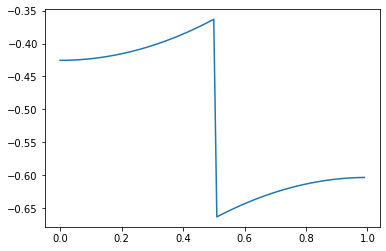

In [40]:
# define q(t) for LSPB between two configurations 

# loop through all time 
Q = []
for t in T:
  if 0 <= t <= tb:
    q = qo + (a/2)*np.power(t,2)
    Q.append(q)
  if tb < t <= tf - tb:
    q = V*t + (qf + qo - V*tf)/2 
    Q.append(q)
  if tf - tb < t <= tf:
    q = qf - (a*np.power(tf,2))/2 + a*tf*t - (a/2)*np.power(t,2)
    Q.append(q)


print(len(Q))
# joint space trajectory 
plt.plot(T,Q)

100


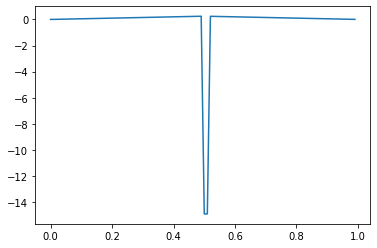

In [43]:
# velocity trajectory 
dQ = np.gradient(Q,T)
print(len(dQ))
plt.plot(T,dQ)

100


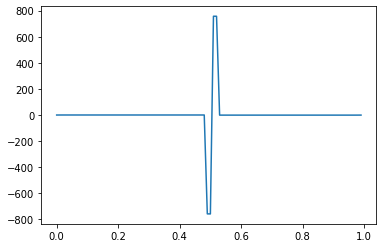

In [44]:
# acceleration trajectory 
d2Q = np.gradient(dQ,T)
print(len(d2Q))
plt.plot(T,d2Q)